# Spotify Tracks Analysis 🎵

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r"C:\Users\acer\Documents\spotify-tracks-analysis\data\spotify_tracks.csv")
df.head()
#

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
#cleaning and handling missing values
df.isnull().sum()

df_cleaned = df.dropna()
print("Shape after dropping missing:", df_cleaned.shape)


Shape after dropping missing: (113999, 21)


In [10]:
#Feature Selection and Engineering
columns_to_drop = ['track_id', 'track_name', 'album_name']
df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns])

# Adding feature: energy/loudness ratio
df_cleaned['energy_loudness_ratio'] = df_cleaned['energy'] / df_cleaned['loudness'].abs()

# Convert duration from ms to minutes
df_cleaned['duration_min'] = df_cleaned['duration_ms'] / 60000


In [11]:
#Data integrity and consistency
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Check data types
df_cleaned.dtypes


Unnamed: 0                 int64
artists                   object
popularity                 int64
duration_ms                int64
explicit                    bool
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                       int64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
time_signature             int64
track_genre               object
energy_loudness_ratio    float64
duration_min             float64
dtype: object

In [12]:
#Summary statistics and insights
# Basic summary
df_cleaned.describe()

# Most common key
print("Most common musical key:", df_cleaned['key'].mode()[0])


Most common musical key: 7


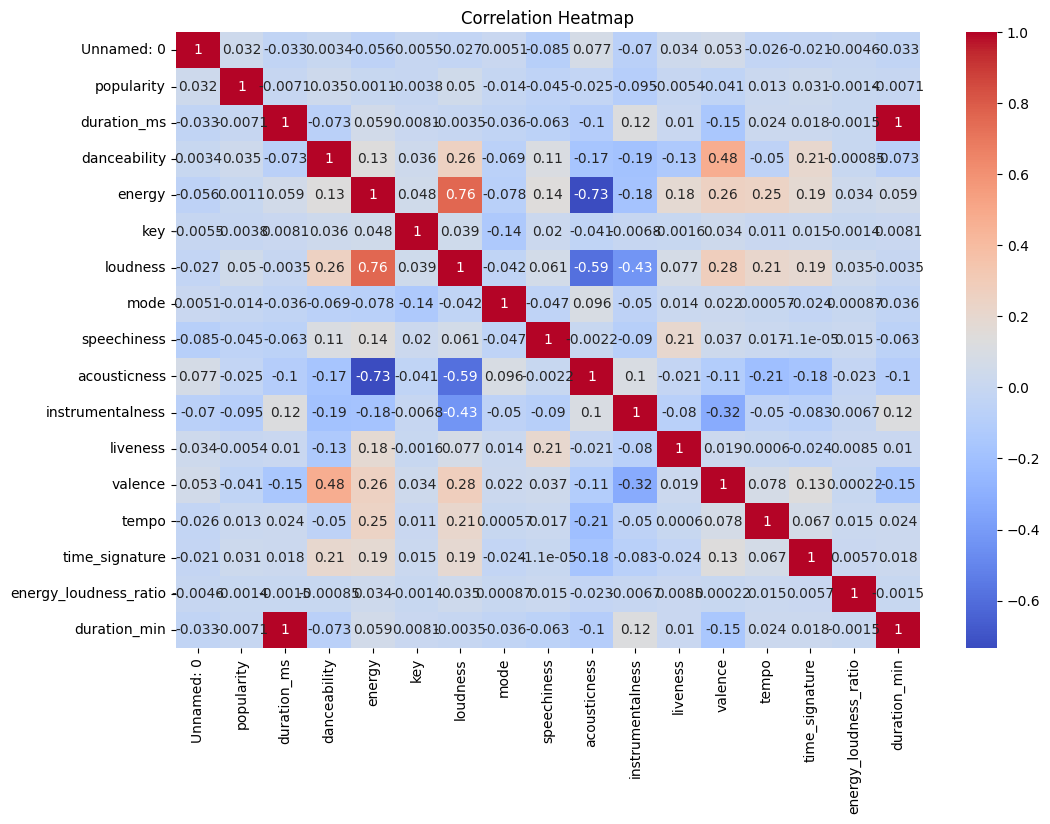

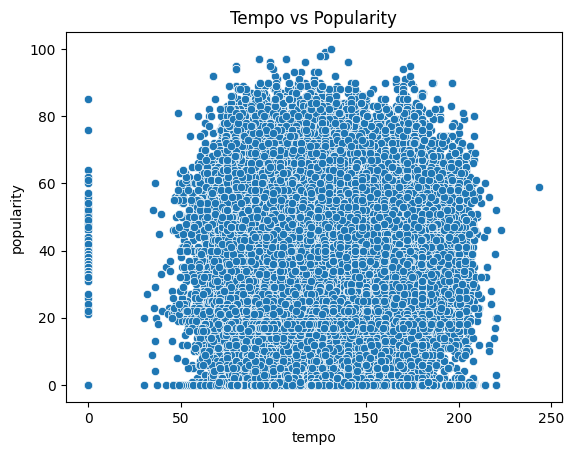

In [14]:
#Identifying Patterns, Trends, and Anomalies 
# Correlation matrix using only numeric columns
numeric_df = df_cleaned.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Tempo vs Popularity
sns.scatterplot(x='tempo', y='popularity', data=df_cleaned)
plt.title("Tempo vs Popularity")
plt.show()


In [15]:
#Handling Outliers and Data Transformation
# IQR method to remove outliers from tempo
Q1 = df_cleaned['tempo'].quantile(0.25)
Q3 = df_cleaned['tempo'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((df_cleaned['tempo'] < (Q1 - 1.5 * IQR)) | (df_cleaned['tempo'] > (Q3 + 1.5 * IQR)))]

# Normalize energy column
scaler = MinMaxScaler()
df_no_outliers['energy_norm'] = scaler.fit_transform(df_no_outliers[['energy']])


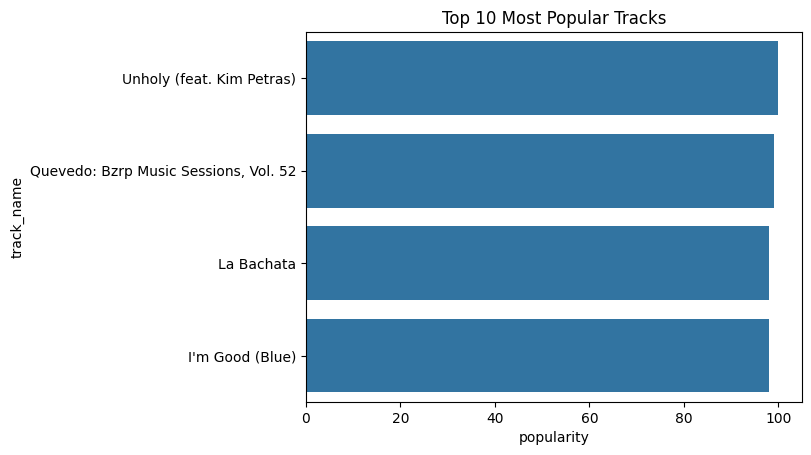

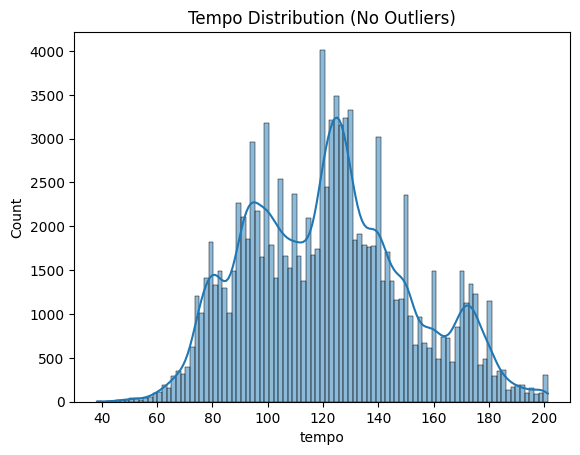

In [16]:
#Initial Visual Representation of Key Findings
# Top 10 tracks by popularity
top_tracks = df.sort_values('popularity', ascending=False).head(10)
sns.barplot(x='popularity', y='track_name', data=top_tracks)
plt.title("Top 10 Most Popular Tracks")
plt.show()

# Distribution of tempo after removing outliers
sns.histplot(df_no_outliers['tempo'], kde=True)
plt.title("Tempo Distribution (No Outliers)")
plt.show()


In [20]:
#Saving cleaned data
df_cleaned.to_csv(r"C:\Users\acer\Documents\spotify-tracks-analysis\data/spotify_cleaned.csv", index=False)
df_no_outliers.to_csv(r"C:\Users\acer\Documents\spotify-tracks-analysis\data/spotify_no_outliers.csv", index=False)
